<a href="https://colab.research.google.com/github/pratyushojha04/IcecreameRevenue/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [194]:
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM

#from keras.utils.vis_utils import plot_model





In [150]:
a=pd.read_csv('/content/BANKNIFTY.csv')

In [151]:
a

,BANKNIFTY,2020/01/01,09:16,32242.6,32295.8,32220.9,32292,0,0.1
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0
...,...,...,...,...,...,...,...,...,...
94542,BANKNIFTY,2020/12/31,15:28,31236.2,31262.4,31232.3,31255.8,0,0
94543,BANKNIFTY,2020/12/31,15:29,31264.8,31267.4,31240.8,31251.6,0,0
94544,BANKNIFTY,2020/12/31,15:30,31255.6,31264.0,31230.6,31237.8,0,0
94545,BANKNIFTY,2020/12/31,15:31,31241.2,31241.2,31241.2,31241.2,0,0


In [152]:
a.tail(50)

,BANKNIFTY,2020/01/01,09:16,32242.6,32295.8,32220.9,32292,0,0.1
94497,BANKNIFTY,2020/12/31,14:43,31280.7,31293.3,31270.6,31290.8,0,0
94498,BANKNIFTY,2020/12/31,14:44,31292.8,31305.0,31289.6,31301.8,0,0
94499,BANKNIFTY,2020/12/31,14:45,31301.6,31313.3,31299.7,31313.3,0,0
94500,BANKNIFTY,2020/12/31,14:46,31312.4,31313.1,31286.3,31291.5,0,0
94501,BANKNIFTY,2020/12/31,14:47,31285.8,31297.0,31284.3,31288.9,0,0
94502,BANKNIFTY,2020/12/31,14:48,31290.3,31290.3,31274.8,31274.8,0,0
94503,BANKNIFTY,2020/12/31,14:49,31280.7,31280.8,31262.4,31274.4,0,0
94504,BANKNIFTY,2020/12/31,14:50,31272.4,31285.6,31268.8,31279.4,0,0
94505,BANKNIFTY,2020/12/31,14:51,31276.9,31288.6,31274.8,31283.7,0,0
94506,BANKNIFTY,2020/12/31,14:52,31286.8,31286.8,31277.1,31280.1,0,0


In [153]:
a.columns

Index(['BANKNIFTY', '2020/01/01', '09:16', '32242.6', '32295.8', '32220.9',
       '32292', '0', '0.1'],
      dtype='object')

In [154]:
a.rename(columns = {'BANKNIFTY':'BANKNIFTY','date':'date','open':'open','high':'high',
                    'low':'low','close':'close','volume':'volume',},
            inplace = True)

In [155]:
a.head()


,BANKNIFTY,2020/01/01,09:16,32242.6,32295.8,32220.9,32292,0,0.1
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0


In [156]:
a.columns = ['BANKNIFTY', 'date','time','open','high','low','close','Adj Close','volume']

In [157]:
a.head()

,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0


In [158]:
df=a[:377]
df

,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0
...,...,...,...,...,...,...,...,...,...
372,BANKNIFTY,2020/01/01,15:29,32117.3,32131.1,32117.3,32126.3,0,0
373,BANKNIFTY,2020/01/01,15:30,32123.6,32135.6,32119.9,32128.9,0,0
374,BANKNIFTY,2020/01/01,15:31,32131.3,32131.3,32131.3,32131.3,0,0
375,BANKNIFTY,2020/01/01,15:33,32132.7,32132.7,32102.9,32102.9,0,0


In [159]:
# listOfTimes=df['date']
# print(listOfTimes)
# buy=False
# sell=False
# buyorder=0
# exit="15:20"
# nottradetime="15:25"
# stoplossbuy=0
# stoplosssell=0
# entrytime="9:15"
# entrytime2="9:20"
# entrytime3="9:25"
# longentry=0
# shortentry=0
# stoplosshit=9
# cumprofit=0
# count=0
# for i in range(len(listOfTimes)):
#   if (entrytime in df['time'][i] ):
#     print("date",df['time'][i])
#     lowtemp=[]
#     lowtemp.append(df['low'][i])
#     lowtemp.append(df['low'][i]-1)
#     lowtemp.append(df['low'][i]-2)
#     stoplossbuy=min(lowtemp)
#     hightemp=[]
#     hightemp.append(df['low'][i])
#     hightemp.append(df['low'][i]-1)
#     hightemp.append(df['low'][i]-2)
#     stoplossbuy=max(hightemp)
#     print(str(stoplossbuy))




In [160]:
df.shape

(377, 9)

In [161]:
df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BANKNIFTY  377 non-null    object 
 1   date       377 non-null    object 
 2   time       377 non-null    object 
 3   open       377 non-null    float64
 4   high       377 non-null    float64
 5   low        377 non-null    float64
 6   close      377 non-null    float64
 7   Adj Close  377 non-null    int64  
 8   volume     377 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.6+ KB


In [162]:
df['close'].isnull().sum()
df['open'].isnull().sum()
df['high'].isnull().sum()
df['low'].isnull().sum()

0

In [163]:
df.describe()

,open,high,low,close,Adj Close,volume
count,377.000000,377.000000,377.000000,377.000000,377.0,377.0
mean,32132.246154,32138.533156,32125.302387,32132.001857,0.0,0.0
std,58.514237,58.700734,57.436878,57.927383,0.0,0.0
min,32064.400000,32072.700000,32057.200000,32065.400000,0.0,0.0
25%,32095.400000,32102.100000,32089.800000,32096.200000,0.0,0.0
50%,32112.400000,32118.200000,32106.100000,32112.000000,0.0,0.0
75%,32145.000000,32150.100000,32137.800000,32144.200000,0.0,0.0
max,32341.800000,32348.000000,32337.700000,32340.600000,0.0,0.0


In [164]:
df.columns

Index(['BANKNIFTY', 'date', 'time', 'open', 'high', 'low', 'close',
       'Adj Close', 'volume'],
      dtype='object')

<Axes: >

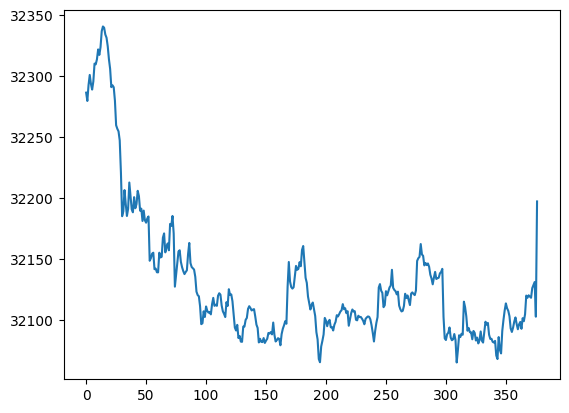

In [165]:
df['close'].plot()

<Axes: >

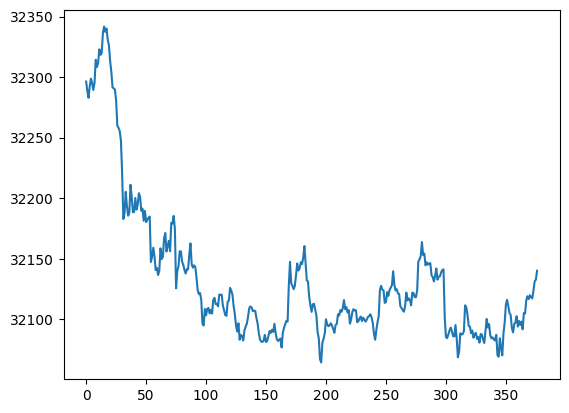

In [166]:
df['open'].plot()

<Axes: >

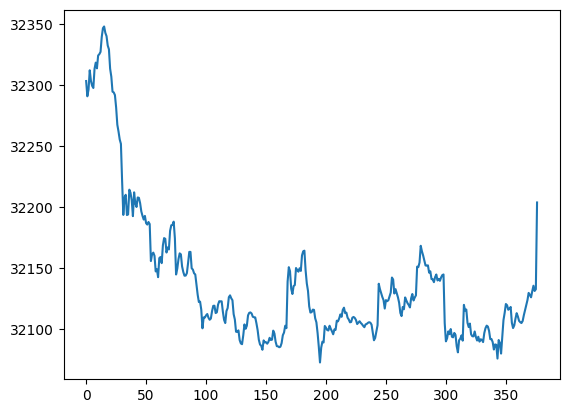

In [167]:
df['high'].plot()

<Axes: xlabel='time'>

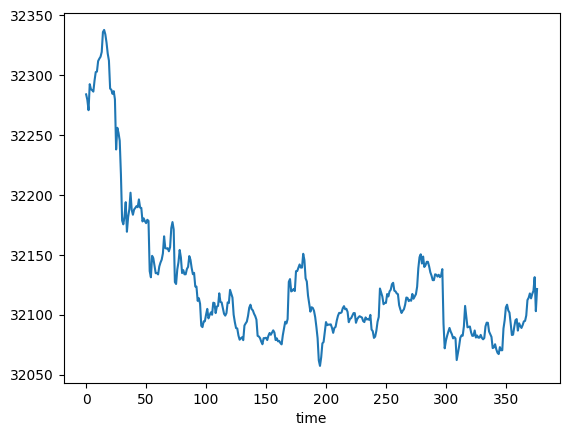

In [168]:
df['low'].plot(xlabel='time')

<Axes: >

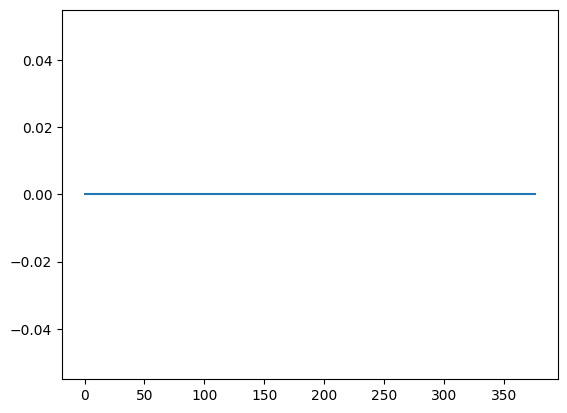

In [169]:
df['Adj Close'].plot()

In [ ]:
features = ['Open', 'High', 'Low', 'Volume']


In [186]:
features = ['Open', 'High', 'Low', 'Volume']
output_var = pd.DataFrame(df['features'])

KeyError: ignored

In [183]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(output_var[output_var.columns])
feature_transform= pd.DataFrame(columns=output_var.columns, data=feature_transform, index=output_var.index)
feature_transform.head()



# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# df[df.columns] = mms.fit_transform(df)
# df.head()

,Adj Close
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [187]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [179]:
df.corr

<bound method DataFrame.corr of      BANKNIFTY        date   time     open     high      low    close  \
0    BANKNIFTY  2020/01/01  09:17  32296.3  32303.3  32283.9  32286.4   
1    BANKNIFTY  2020/01/01  09:18  32288.3  32290.8  32279.3  32279.6   
2    BANKNIFTY  2020/01/01  09:19  32282.9  32296.3  32270.7  32292.6   
3    BANKNIFTY  2020/01/01  09:20  32292.4  32312.1  32292.4  32300.9   
4    BANKNIFTY  2020/01/01  09:21  32298.7  32303.4  32288.2  32293.5   
..         ...         ...    ...      ...      ...      ...      ...   
372  BANKNIFTY  2020/01/01  15:29  32117.3  32131.1  32117.3  32126.3   
373  BANKNIFTY  2020/01/01  15:30  32123.6  32135.6  32119.9  32128.9   
374  BANKNIFTY  2020/01/01  15:31  32131.3  32131.3  32131.3  32131.3   
375  BANKNIFTY  2020/01/01  15:33  32132.7  32132.7  32102.9  32102.9   
376  BANKNIFTY  2020/01/02  09:16  32140.1  32203.8  32121.4  32197.3   

     Adj Close  volume  
0            0       0  
1            0       0  
2            0  

In [188]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [195]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
#plot_model(lstm, show_shapes=True, show_layer_names=True)

In [196]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
43/43 [==============================] - 4s 2ms/step - loss: 0.0000e+00
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 11/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 12/100
43/43 [==============================] - 0s 2ms/step - loss: 

In [197]:
y_pred= lstm.predict(X_test)

2/2 [==============================] - 0s 10ms/step


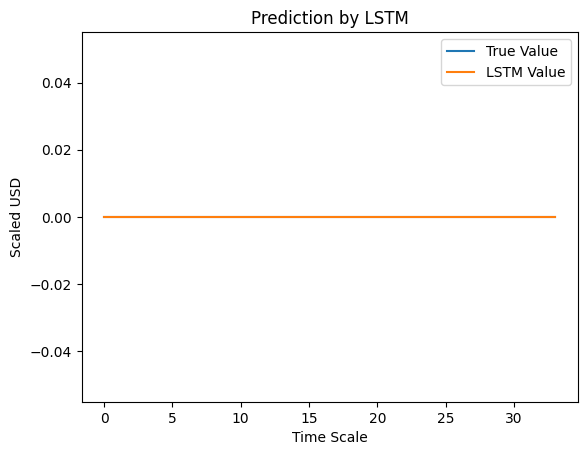

In [199]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()